# <center>Кластеризация

>**Кластеризация** — это задача группировки объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров, по какому-либо критерию.

# <center>K-means

**Идея** алгоритма k-means состоит в том, что он итеративно разбивает множество объектов на заранее заданное пользователем число кластеров и стремится минимизировать расстояние от объектов внутри кластера до центроида кластера.

В результате мы получаем сгруппированные по кластерам **точки** и **центроид** (его ещё иногда называют **центром тяжести**) для каждого кластера. Визуально это может выглядеть, например, так (на графике показано разделение на четыре кластера):

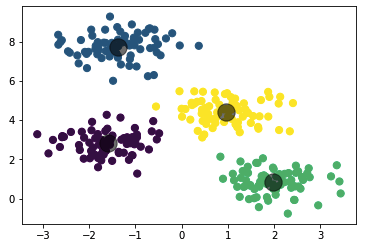

K-means является самым популярным алгоритмом. Он широко применяется для:
* сегментации изображений;
* сегментации хромосом;
* выявления ботов и аномалий;
* группировки новостных комментариев.

1. Предположим, у нас есть некоторое количество точек, расположенных на двухмерной плоскости:

    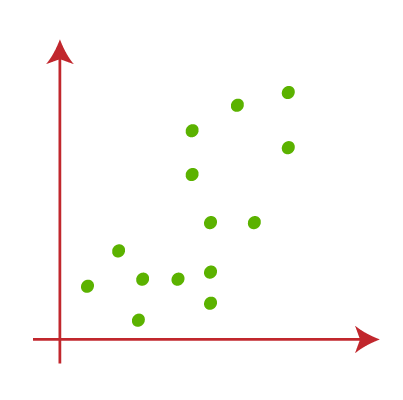
2. Будем считать, что у нас два кластера. Выберем случайные точки, которые будут центроидами кластеров (это могут быть точки, принадлежащие нашим данным, или какие-то другие):

    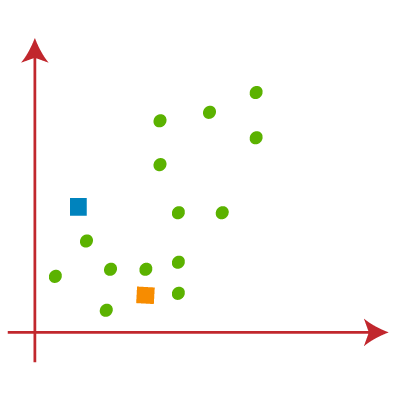
3. Теперь для каждой точки рассчитаем расстояния до обоих центроидов и отнесём её к кластеру, центроид которого находится ближе к ней:

    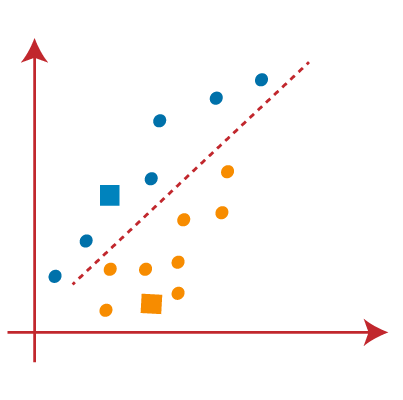
4. Для каждого кластера найдём новый центроид — такую точку, сумма квадратов расстояний до которой будет минимальной:

    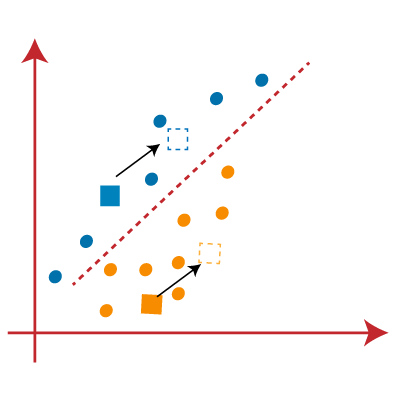
5. Далее снова рассчитаем для каждой точки расстояния до обоих центроидов и отнесём её к тому кластеру, центроид которого находится ближе к ней (в результате некоторые точки «переходят» от одного кластера к другому):

    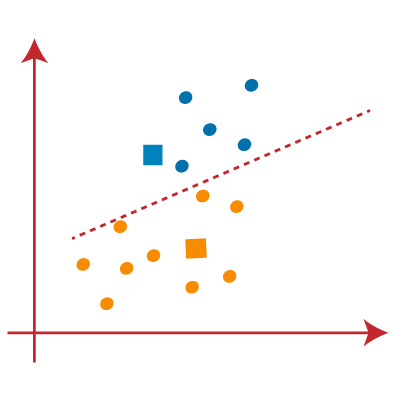
6. Мы получили новые кластеры. Теперь найдём новые центроиды для этих кластеров:

    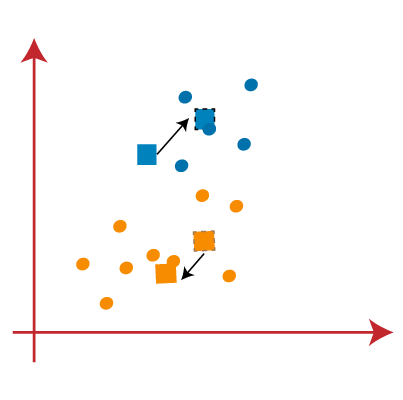
7. Повторяя данные шаги до сходимости, получаем кластеры с объектами:

    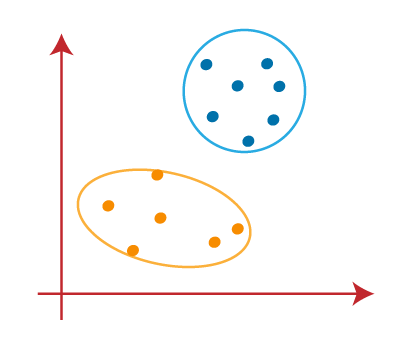

* Пусть $X$ — это пространство объектов.
* $X^N = \{ x_1, \dots, x_N \}$ — обучающая выборка.
* $ \rho : X \times X \to [0, \infty] $ — функция расстояния между объектами.

Необходимо найти:
* $Y$ — множество кластеров.
* $a: X \to Y$ — алгоритм кластеризации, такой, что выполняются следующие условия:
    * каждый кластер состоит из близких (схожих между собой) объектов;
    * объекты разных кластеров существенно различаются.

Важно сразу обозначить, что решение задачи кластеризации очень неоднозначно, так как:

* много критериев для оценки качества;
* много эвристических (не обусловленных математической теорией) методов кластеризации;
* обычно число кластеров неизвестно заранее (мы сами определяем его);
* результат кластеризации сильно зависит от параметров, которые также являются эвристиками.

Несмотря на это, кластеризация всё равно популярна и часто используется при решении прикладных задач, так как позволяет упрощать обработку данных, сокращать их объём, выделять нетипичные объекты и строить иерархию для множества объектов.

**Математическая формулировка (*алгоритм Ллойда* — именно этот алгоритм используется в `sklearn`):**

Дана выборка $x_1, \dots, x_N$.

Параметр, который мы задаём для инициализации алгоритма, — число кластеров $K: K = |Y|$

В качестве результата мы хотим получить центры кластеров $\mu_k$ и метки $k \in Y$.
1. Задаём начальные приближения центров $\mu_k$ для всех $k \in Y$ (например, случайным образом).
2. Повторяем по очереди:
    * Относим каждый объект к ближайшему центру:
    $$ k_i = \argmin_{k \in Y} || x_i - \mu_k ||, \space i=1,\dots,N $$
    Ближайший центр — это центр, до которого евклидово расстояние минимально.
    * Перемещаем центр каждого кластера в центр тяжести:
    $$ \mu_k = \frac{\sum^N_{i=1}[a_i=a]x_i}{\sum^N{i=1}[a_i=a]}, \space a \in Y $$
    В числителе суммируются все точки, которые принадлежат кластеру, для которого мы ищем центроид ($[k_i=k]$ проверяет принадлежность кластеру $k$), а в знаменателе суммируется их количество. В итоге получается отношение суммы и количества — это и есть среднее арифметическое. Работа алгоритма закончится тогда, когда выполнится число заданных заранее итераций или когда кластеры и центроиды перестанут изменяться.

У алгоритма *k-means* есть ряд **недостатков**:
* число кластеров надо знать заранее;
* очень чувствителен к первичному выбору центроидов;
* не гарантирует достижения глобального минимума суммы квадратов расстояний, периодически «застревает» в локальном минимуме.

Также у k-means есть вариации, которые применяются в некоторых специфических случаях.



